# Predicting Diabetes using Artificial Neural Network

In this notebook we will learn how to predict whether a person will acquire diabetes in her lifetime given various body parameters using Neural Networks

## Importing Dependencies
1. [Numpy](https://www.numpy.org/): For matrix calculations
2. [Pandas](https://pandas.pydata.org/): For reading csv file
3. [Matplotlib](https://matplotlib.org/): For plotting data
4. [Scikit-Learn](https://scikit-learn.org/): Splitting and testing data

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
%matplotlib inline

## for producing consistent results
tf.set_random_seed(4)

## Loading Dataset
Dataset contains following columns:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome:  Class variable (0 or 1)

More inofrmation about dataset can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [50]:
## dataset link
DATA_LINK = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

## reading csv file present at url
data = pd.read_csv(DATA_LINK, header = None)

## first 10 rows
data.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
## extracting features
X_data = np.array(data.iloc[:, 0:8])

## normalizing dataset
X_data -= np.mean(X_data, axis = 0)
X_data /= np.std(X_data, axis = 0)

## target
y_data = np.array(data.iloc[:, 8])

## the numpy array returned is of shape (n_examples,) but we need a 2-D array to feed to tensor
y_data = np.expand_dims(y_data, axis = 1)

## Splitting Dataset
For the purpose of training and testing, we split the dataset in ratio of 70% (training) and 30% (testing) <br/>
For this purpose we use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of [scikit-learn](https://scikit-learn.org/)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state = 4)

In [9]:
X = tf.placeholder(tf.float32, [None, 8])
y = tf.placeholder(tf.float32, [None, 1])

## Neural Network Architecture
In this problem we use a Dense Neural Network, with 2 hidden layers with 12 and 8 hidden units, respectively. <br/>
For the first hidden layer, relu activation is used and for the second hidden unit, tanh activation is used.
<img src = "Images/nn.svg">

In [46]:
weights = {'W1': tf.Variable(np.random.randn(8, 12), dtype = tf.float32),
           'b1': tf.Variable(np.random.randn(12), dtype = tf.float32),
           'W2': tf.Variable(np.random.randn(12, 8), dtype = tf.float32),
           'b2': tf.Variable(np.random.randn(8), dtype = tf.float32),
           'W3': tf.Variable(np.random.randn(8, 1), dtype = tf.float32),
           'b3': tf.Variable(np.random.randn(1), dtype = tf.float32)
          }

In [28]:
def generateProbability(weights, X):
    
    ## first layer
    layer_1 = tf.matmul(X, weights["W1"]) + weights["b1"]
    ## relu activation
    layer_1 = tf.nn.relu(layer_1)
    
    ## second layer
    layer_2 = tf.matmul(layer_1, weights["W2"]) + weights["b2"]
    ## tanh activation
    layer_2 = tf.nn.tanh(layer_2)
    
    ## third layer
    layer_3 = tf.matmul(layer_2,weights["W3"]) + weights["b3"]
    return tf.sigmoid(layer_3)

In [29]:
def loss(weights, X, y):
    predict_prob = generateProbability(weights, X)
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = predict_prob, labels = y))

In [30]:
def predict(weights, X):
    predict_proba = generateProbability(weights, X)
    return tf.math.floor(2 * predict_proba)

In [35]:
cost = loss(weights, X, y)
acc = accuracy(weights, X, y)
pred = predict(weights, X)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [44]:
%%time
train_cost_cache = []
test_cost_cache = []
train_acc_cache = []
test_acc_cache = []

with tf.Session() as sess:
    ## initializing global variables
    sess.run(init)
    for num_iter in tqdm_notebook(range(10**3)):
        
        ## data fed through feed dictionary
        ## returns the optimizer and current cost
        _, train_cost, train_predictions = sess.run([optimizer, cost, pred], feed_dict = {X: X_train, y: y_train})
        test_cost, test_predictions = sess.run([cost, pred], feed_dict = {X: X_test, y: y_test})
        
        
        if num_iter % 10 == 0:
            train_cost_cache.append(train_cost)
            
            print("Iteration: {}, Training Loss = {}".format(num_iter, train_cost))
            print("Training Accuracy = {}".format(accuracy_score(train_predictions, y_train)))
            
            train_acc_cache.append(accuracy_score(train_predictions, y_train))
            
            test_cost_cache.append(test_cost)
            
            print("Test Loss = {}".format(test_cost))
            print("Test Accuracy = {}".format(accuracy_score(test_predictions, y_test)))
            test_acc_cache.append(accuracy_score(test_predictions, y_test))

Iteration:0, Training Loss = 0.7411419749259949
Training Accuracy = 0.659217877094972
Test Loss = 0.7409563660621643
Test Accuracy = 0.6623376623376623
Iteration:10, Training Loss = 0.7016026973724365
Training Accuracy = 0.6852886405959032
Test Loss = 0.7035964131355286
Test Accuracy = 0.6883116883116883
Iteration:20, Training Loss = 0.6816326379776001
Training Accuracy = 0.7094972067039106
Test Loss = 0.6844578981399536
Test Accuracy = 0.70995670995671
Iteration:30, Training Loss = 0.6731036901473999
Training Accuracy = 0.7225325884543762
Test Loss = 0.6761326789855957
Test Accuracy = 0.7359307359307359
Iteration:40, Training Loss = 0.667444109916687
Training Accuracy = 0.7355679702048417
Test Loss = 0.6738280653953552
Test Accuracy = 0.7229437229437229
Iteration:50, Training Loss = 0.6622955799102783
Training Accuracy = 0.7746741154562383
Test Loss = 0.6711366772651672
Test Accuracy = 0.7402597402597403
Iteration:60, Training Loss = 0.6577881574630737
Training Accuracy = 0.7877094972

Test Loss = 0.6859558820724487
Test Accuracy = 0.7316017316017316
Iteration:600, Training Loss = 0.6094255447387695
Training Accuracy = 0.8901303538175046
Test Loss = 0.6860063076019287
Test Accuracy = 0.7316017316017316
Iteration:610, Training Loss = 0.6088659167289734
Training Accuracy = 0.8919925512104283
Test Loss = 0.6852986812591553
Test Accuracy = 0.7316017316017316
Iteration:620, Training Loss = 0.6085562705993652
Training Accuracy = 0.8919925512104283
Test Loss = 0.6854984164237976
Test Accuracy = 0.7316017316017316
Iteration:630, Training Loss = 0.6083281636238098
Training Accuracy = 0.8919925512104283
Test Loss = 0.6848921775817871
Test Accuracy = 0.7445887445887446
Iteration:640, Training Loss = 0.6081413626670837
Training Accuracy = 0.8919925512104283
Test Loss = 0.6846205592155457
Test Accuracy = 0.7402597402597403
Iteration:650, Training Loss = 0.6079677939414978
Training Accuracy = 0.8919925512104283
Test Loss = 0.6846485733985901
Test Accuracy = 0.7445887445887446
Iter

Text(0, 0.5, 'Test Accuracy')

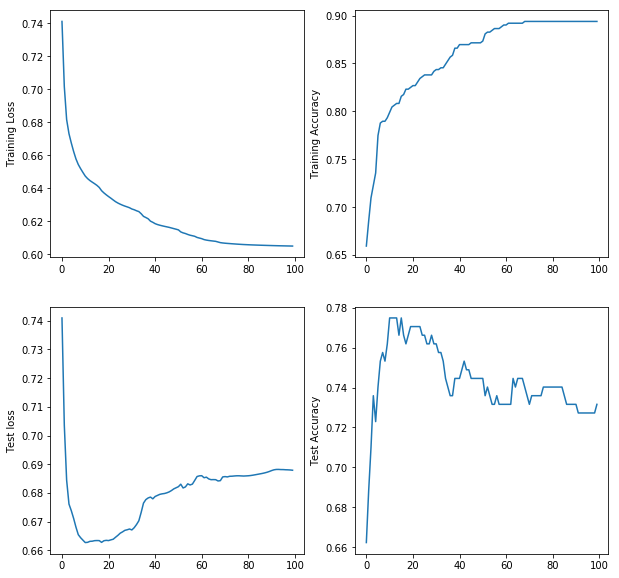

In [45]:
fig = plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.plot(train_cost_cache)
plt.ylabel('Training Loss')

plt.subplot(2, 2, 2)
plt.plot(train_acc_cache)
plt.ylabel('Training Accuracy')

plt.subplot(2, 2, 3)
plt.plot(test_cost_cache)
plt.ylabel('Test loss')

plt.subplot(2, 2, 4)
plt.plot(test_acc_cache)
plt.ylabel('Test Accuracy')
